# Exercícios 

Você recebeu o arquivo **Swarm_Behaviour.csv**. Ele contém informações sobre locomoção de grupos de animais. Existe um atributo chamado **'Swarm_Behaviour'** que classifica o movimento como agrupado (1) e não agrupado (0).


1. É possível criar um bom modelo para prevê-lo? Escolha um modelo de ML e teste suas métricas de performance utilizando o número máximo de atributos.

2. Utilize o PCA e verifique o comportamento da variância explicada como função do número de componentes principais (faça um gráfico). 

Para cada experimento abaixo, considere 10 o número máximo de componentes. 

3. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do PCA. 

4. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do Kernel-PCA. 

5. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do LDA.

6. Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do TSNE. 

7. Apresente graficamente a comparação entre todas as medições de performance observadas anteriormente em um único gráfico (plt.bar).

8. Qual foi a melhor estratégia para esse dado? 







In [1]:
import pandas as pd 
import seaborn as sns 

In [2]:
df=pd.read_csv('Swarm_Behaviour.csv.zip')

In [3]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [4]:
df['Swarm_Behaviour'].value_counts()

Swarm_Behaviour
0.0    15355
1.0     7954
Name: count, dtype: int64

# Amostra do dado

In [5]:
df.sample(frac=0.1)


,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
664,-171.02,-297.06,-15.43,-6.24,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.0,0.0,0.0,49,0,0.0
19219,1155.64,-330.26,-1.41,-9.55,0.00,0.00,0.00,0.00,0.00,0.00,...,-6.65,0.00,0.00,0.00,0.0,0.0,0.0,3,0,0.0
15113,-1266.38,275.05,0.08,9.91,0.00,1.00,0.00,0.00,-0.15,0.99,...,8.09,0.00,0.00,0.00,0.0,0.0,0.0,0,0,1.0
5236,-1178.34,250.42,7.65,2.72,0.00,0.00,0.00,0.00,0.00,0.00,...,5.53,0.00,0.00,0.00,0.0,0.0,0.0,4,0,0.0
6023,-256.71,-227.16,5.50,14.93,0.00,1.00,0.00,0.00,0.00,0.00,...,17.56,0.00,1.00,0.00,0.0,0.0,0.0,9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6520,-1379.02,-528.25,-0.58,-3.96,0.00,0.00,0.00,0.00,0.00,0.00,...,-4.43,0.00,0.00,-1.17,0.4,0.0,0.0,4,1,0.0
21898,1124.55,-11.61,8.08,4.50,0.00,0.00,0.00,0.00,0.00,0.00,...,7.71,0.00,0.00,0.00,0.0,0.0,0.0,4,0,0.0
21028,804.77,965.27,-1.93,-0.78,0.00,0.00,0.00,0.00,0.00,0.00,...,-3.44,0.00,0.00,0.00,0.0,0.0,0.0,34,0,0.0
20277,-154.02,-834.40,8.32,4.75,0.00,0.00,-0.84,-0.55,0.00,0.00,...,8.85,0.00,0.00,0.00,0.0,0.0,0.0,1,0,0.0


In [6]:
df.sample(frac=0.2)['Swarm_Behaviour'].value_counts()

Swarm_Behaviour
0.0    3035
1.0    1627
Name: count, dtype: int64

In [7]:
df=df.sample(frac=0.2).reset_index(drop=True)

In [8]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,284.63,928.88,1.16,11.07,0.10,1.04,0.00,0.00,0.00,0.00,...,9.76,0.03,1.04,0.00,0.00,0.00,0.00,13,0,0.0
1,1397.41,140.42,6.48,3.61,0.00,0.00,0.00,0.00,0.00,0.00,...,7.80,0.00,0.00,-0.86,-0.52,0.00,0.00,6,1,0.0
2,1121.63,-188.60,-0.29,8.03,-0.04,1.00,0.00,0.00,-0.04,1.00,...,8.72,-0.04,1.00,0.00,0.00,-0.04,1.00,12,1,1.0
3,347.92,760.51,5.31,6.70,0.00,1.00,0.00,0.00,0.00,0.00,...,9.49,0.00,1.00,0.00,0.00,0.00,0.00,2,0,0.0
4,108.82,411.67,1.74,6.86,0.00,0.00,0.00,0.00,0.00,0.00,...,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4657,308.86,946.80,-2.78,-5.39,-0.27,-0.49,-5.66,-4.96,0.00,-0.28,...,3.00,-0.23,-0.62,25.95,12.79,0.08,0.00,106,3,0.0
4658,-663.10,555.88,-6.00,-4.61,-0.62,-0.78,0.00,0.00,0.56,-0.83,...,-2.14,-0.98,-0.19,0.00,0.00,-0.88,0.47,3,1,1.0
4659,93.23,-766.78,-1.22,8.44,-0.06,1.04,0.00,0.00,0.00,0.00,...,7.94,0.00,1.04,0.00,0.00,0.00,0.00,12,0,0.0
4660,-1230.96,885.39,-0.97,7.38,0.07,1.00,0.00,0.00,-0.28,0.96,...,7.22,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1.0


# Equilibrar o dado

In [9]:
df1=df[df['Swarm_Behaviour']==1].reset_index(drop=True)
df0=df[df['Swarm_Behaviour']==0][0:len(df1)].reset_index(drop=True)
df_equi=pd.concat([df0,df1],axis=0,ignore_index=True)

In [10]:
df_equi

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,284.63,928.88,1.16,11.07,0.10,1.04,0.00,0.00,0.00,0.00,...,9.76,0.03,1.04,0.00,0.00,0.00,0.00,13,0,0.0
1,1397.41,140.42,6.48,3.61,0.00,0.00,0.00,0.00,0.00,0.00,...,7.80,0.00,0.00,-0.86,-0.52,0.00,0.00,6,1,0.0
2,347.92,760.51,5.31,6.70,0.00,1.00,0.00,0.00,0.00,0.00,...,9.49,0.00,1.00,0.00,0.00,0.00,0.00,2,0,0.0
3,108.82,411.67,1.74,6.86,0.00,0.00,0.00,0.00,0.00,0.00,...,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2,0,0.0
4,-218.18,-122.66,5.50,14.93,0.00,1.00,0.00,0.00,0.00,0.00,...,15.46,0.00,1.00,0.00,0.00,0.00,0.00,7,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199,-454.69,-668.32,3.13,-3.49,0.00,0.00,0.08,0.43,-0.76,-0.65,...,0.63,0.00,0.00,-0.11,-0.42,0.85,0.53,112,3,1.0
3200,-463.47,-631.62,3.38,-1.13,0.00,0.00,-0.06,0.44,-0.40,-0.92,...,-1.42,0.00,0.00,0.16,-0.41,-0.39,0.92,112,43,1.0
3201,458.85,-206.31,-7.10,-2.32,-0.56,0.03,0.69,-1.71,0.04,-0.32,...,-1.19,-0.56,0.01,0.00,0.00,-0.23,-0.22,2,0,1.0
3202,-663.10,555.88,-6.00,-4.61,-0.62,-0.78,0.00,0.00,0.56,-0.83,...,-2.14,-0.98,-0.19,0.00,0.00,-0.88,0.47,3,1,1.0


In [11]:
df_equi['Swarm_Behaviour'].value_counts()

Swarm_Behaviour
0.0    1602
1.0    1602
Name: count, dtype: int64

# Teste com o t-sne

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

In [13]:
tsne = TSNE(n_components=2,n_iter=1000)

In [14]:
X=df_equi.drop('Swarm_Behaviour',axis=1)
y=df_equi["Swarm_Behaviour"]

In [15]:
X_tsne = tsne.fit_transform(X)

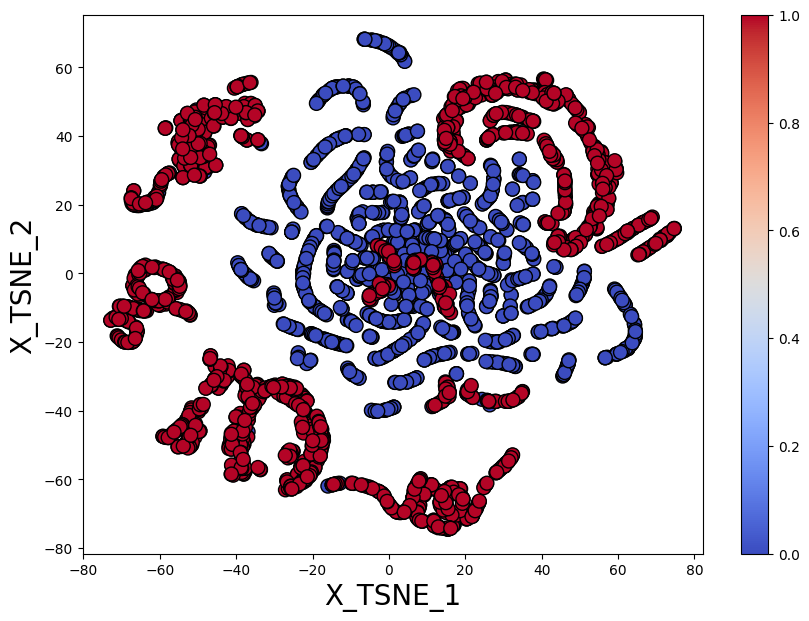

In [16]:
plt.figure(figsize=(10,7))
plt.xlabel('X_TSNE_1',fontsize=20)
plt.ylabel('X_TSNE_2',fontsize=20)
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,s=100,edgecolors='black',cmap='coolwarm')
plt.colorbar()

# Questão 1. 
É possível criar um bom modelo para prevê-lo? Escolha um modelo de ML e teste suas métricas de performance utilizando o número máximo de atributos.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

from sklearn.neural_network import MLPClassifier


In [18]:
features = df_equi.columns[0:-1]
target = df_equi.columns[-1]

## Dados Originais equilibrados

In [19]:
# Precissão com dados originais
X=df_equi[features]# dimensoes
y=df_equi[target]# alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_dados=accuracy_score(y_test,y_pred)

0.8489388264669163 0.8496469246114493


## Dados Escalonado

In [20]:
from sklearn.preprocessing import StandardScaler

X=df_equi[features]# dimensoes
y=df_equi[target]# alvo

# Escalonamento
scaler=StandardScaler()
X_scalonado=scaler.fit_transform(X)

In [21]:
X_scalonado.shape

(3204, 2400)

In [28]:
# Precissão com dados originais
X=X_scalonado# dimensoes
y=df_equi[target]# alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_escalonado=accuracy_score(y_test,y_pred)

0.8951310861423221 0.8951432072165975


# Questão 2. 
Utilize o PCA e verifique o comportamento da variância explicada como função do número de componentes principais (faça um gráfico). 

## PCA

In [23]:
from sklearn.decomposition import PCA

# PCA
pca=PCA(n_components=10)
X_pca=pca.fit_transform(X_scalonado)

# print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

0.41552848503063744


Text(0.5, 0, 'COMPONENTE')

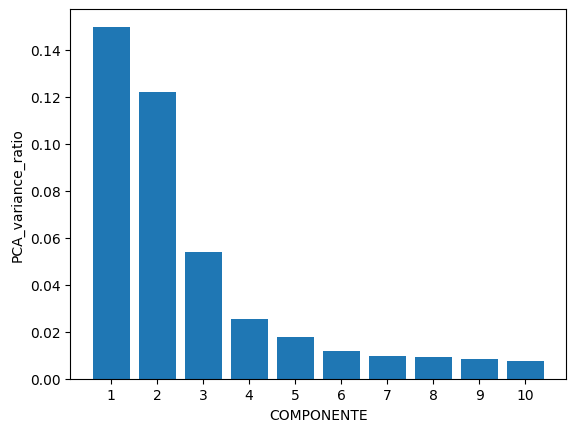

In [24]:
import numpy as np

plt.bar(np.arange(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_,)
plt.xticks(np.arange(1,len(pca.explained_variance_ratio_)+1),np.arange(1,len(pca.explained_variance_ratio_)+1))
plt.ylabel('PCA_variance_ratio')
plt.xlabel('COMPONENTE')

### Para cada experimento abaixo, considere 10 o número máximo de componentes. 

# Questão 3.

Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do PCA. 

In [25]:
columns=['PCA'+str(i) for i in range(1,len(pca.explained_variance_ratio_)+1)]
df_pca=pd.DataFrame(data=X_pca,columns=columns)

In [34]:
# Precissão com pca

# dropar coluna TARGET
X=df_pca # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_pca=accuracy_score(y_test,y_pred)

0.9151061173533084 0.9150656105047075


# Questão 4
Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do Kernel-PCA. 

In [31]:
from sklearn.decomposition import KernelPCA

ke=KernelPCA(n_components=10,kernel='linear')

X_ke=ke.fit_transform(X_scalonado)

In [33]:
# Precissão com kernel pca

# dropar coluna TARGET
X=X_ke # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_kernel_pca=accuracy_score(y_test,y_pred)

0.9063670411985019 0.9063226588154232


# Questão 5 
Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do LDA.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda=LinearDiscriminantAnalysis(n_components=None)

X=X_scalonado;
y = df_equi[target];

X_lda=lda.fit_transform(X,y)
y_lda=y

In [37]:
# Precissão com kernel pca

# dropar coluna TARGET
X=X_lda # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_lda=accuracy_score(y_test,y_pred)

0.9937578027465668 0.9937574713602547


# Questão 6
Verifique o comportamento das métricas de avaliação em relação a quantidades de componentes principais imposto ao modelo de ML escolhido através do TSNE. 

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=1000)

X = X_scalonado
y = df_equi[target]

X_tsne = tsne.fit_transform(X)

In [39]:
# Precissão com kernel pca

# dropar coluna TARGET
X=X_tsne # dimensoes
y=df_equi[target] # alvo

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

clf=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(6,10),random_state=42, max_iter=3000)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'))
accuracy_tsne=accuracy_score(y_test,y_pred)

0.867665418227216 0.867665418227216


# Questão 7
Apresente graficamente a comparação entre todas as medições de performance observadas anteriormente em um único gráfico (plt.bar).

(0.0, 1.2)

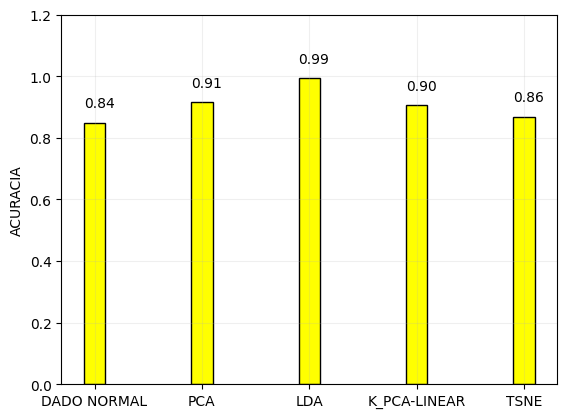

In [42]:
valores=[accuracy_dados,accuracy_pca,accuracy_lda,accuracy_kernel_pca,accuracy_tsne]
nome_modelo=['DADO NORMAL','PCA','LDA','K_PCA-LINEAR','TSNE']

plt.bar(nome_modelo,valores,edgecolor='black',color='yellow',width=0.2)
plt.grid(alpha=0.2)
plt.ylabel('ACURACIA')

plt.annotate(str(valores[0])[0:4],(0-0.1,valores[0]+0.05))
plt.annotate(str(valores[1])[0:4],(1-0.1,valores[1]+0.05))
plt.annotate(str(valores[2])[0:4],(2-0.1,valores[2]+0.05))
plt.annotate(str(valores[3])[0:4],(3-0.1,valores[3]+0.05))
plt.annotate(str(valores[4])[0:4],(4-0.1,valores[4]+0.05))

plt.ylim(0,1.2)

# Questão 8
Qual foi a melhor estratégia para esse dado? 

Resposta = LDA